In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#setting seaborn style
sns.set(style='whitegrid', palette='deep', font_scale=1.5, color_codes=True,context="paper")

In [4]:
#reading the csv file
df=pd.read_csv('Leads.csv')

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df.shape

(9240, 37)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [8]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
#checking null value
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#drop the columns which have more than 30% null values
df = df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
              'Asymmetrique Profile Score','Lead Quality','Tags'], 1)

In [12]:
#unique id, not useful.
df = df.drop('Lead Number',1)

In [13]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Kuwait                     4
Germany                    4
South Africa               4
Nigeria                    4
Sweden                     3
Bangladesh                 2
Asia/Pacific Region        2
Italy                      2
China                      2
Uganda                     2
Philippines                2
Ghana                      2
Netherlands                2
Belgium                    2
Indonesia                  1
Sri Lanka                  1
Denmark                    1
Malaysia                   1
Kenya                      1
Russia                     1
Vietnam       

In [15]:
# dropping country column as it is not having more variance
df=df.drop('Country',axis=1)

In [16]:
df.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [17]:
#convert the level 'Select' to null. And check the null counts.
df.loc[df.Specialization == 'Select',['Specialization']] = np.nan

In [18]:
round(100*(df['Specialization'].isnull().sum()/len(df.index)), 2)

36.58

In [19]:
#null count is high, so dropping it
df=df.drop('Specialization',axis=1)

In [20]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [21]:
round(100*(df['How did you hear about X Education'].isnull().sum()/len(df.index)), 2)

23.89

In [22]:
#we covert the level 'select' to null and check the null value percent.
df.loc[df['How did you hear about X Education'] == 'Select',['How did you hear about X Education']] = np.nan

In [23]:
round(100*(df['How did you hear about X Education'].isnull().sum()/len(df.index)), 2)

78.46

In [24]:
#we can drop this column as null count becomes high.
df=df.drop('How did you hear about X Education',axis=1)

In [25]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
#converting the null values to "unknown"
df.loc[df['What is your current occupation'].isnull(),['What is your current occupation']]= 'Unknown'

In [27]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
#converting null to "Better Career Prospects"
df.loc[df['What matters most to you in choosing a course'].isnull(),['What matters most to you in choosing a course']]= 'Better Career Prospects'

In [29]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [30]:
#we covert the level 'select' to null and check the null value percent.
df.loc[df['Lead Profile'] == 'Select',['Lead Profile']] = np.nan

In [31]:
round(100*(df['Lead Profile'].isnull().sum()/len(df.index)), 2)

74.19

In [32]:
#we can drop this column.
df=df.drop('Lead Profile',axis=1)

In [33]:
df.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [34]:
df.loc[df.City == 'Select',['City']] = np.nan

In [35]:
round(100*(df['City'].isnull().sum()/len(df.index)), 2)

39.71

In [36]:
#drop the city column
df=df.drop('City',1)

In [37]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [38]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
WeLearn                 1
testone                 1
blog                    1
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [39]:
df.loc[df['Lead Source'] == 'google',['Lead Source']] = "Google"

In [40]:
#drop rows with null value
df=df[~(df['Lead Source'].isnull())]

In [41]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.41
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.41
Last Activity                                    1.10
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [42]:
df['Do Not Call'].value_counts()

No     9202
Yes       2
Name: Do Not Call, dtype: int64

In [43]:
df['Do Not Email'].value_counts()

No     8483
Yes     721
Name: Do Not Email, dtype: int64

In [44]:
#drop "Do Not Call"
df=df.drop('Do Not Call',1)

In [45]:
df['Converted'].value_counts()

0    5672
1    3532
Name: Converted, dtype: int64

In [46]:
#drop rows with null value
df=df[~(df['TotalVisits'].isnull())]

In [47]:
df['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [48]:
df['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [49]:
df['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [50]:
df['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [51]:
df['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [52]:
df['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [53]:
df['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [54]:
df['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [55]:
df['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [56]:
df['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [57]:
df['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [58]:
df['A free copy of Mastering The Interview'].value_counts() 

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [59]:
#dropping the below columns as no variance in the data. 
df=df.drop(['I agree to pay the amount through cheque','Get updates on DM Content',
            'Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine'],1)

In [60]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                         

In [61]:
df.shape

(9074, 19)

#### We come to a clean dataset now and proceed with the next steps

In [62]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [63]:
# List of variables to map
varlist =  ['Do Not Email','Search','Newspaper Article','X Education Forums','Newspaper',
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [64]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified


In [65]:
#we get dummies for the remaining categorical variables
df1=pd.get_dummies(df,columns=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                               'What matters most to you in choosing a course','Last Notable Activity'],drop_first=True)

In [66]:
df1.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [67]:
#Below are our continuous variable
num_col=df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [68]:
num_col.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


#### Perform outlier treatment

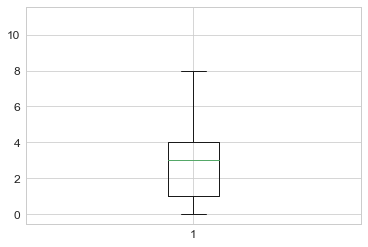

In [69]:
Q1 = df1.TotalVisits.quantile(0.25)
Q3 = df1.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1.TotalVisits >= Q1 - 1.5*IQR) & (df1.TotalVisits <= Q3 + 1.5*IQR)]
plt.boxplot(df1.TotalVisits)
plt.show()

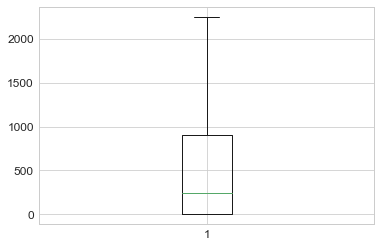

In [70]:
Q1 = df1['Total Time Spent on Website'].quantile(0.25)
Q3 = df1['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (df1['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]
plt.boxplot(df1['Total Time Spent on Website'])
plt.show()

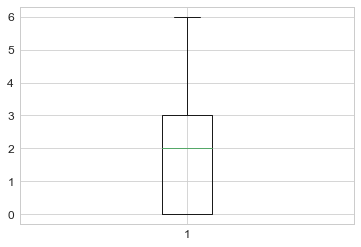

In [71]:
Q1 = df1['Page Views Per Visit'].quantile(0.25)
Q3 = df1['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df1['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
plt.boxplot(df1['Page Views Per Visit'])
plt.show()

In [72]:
num_col=df1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_col.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8512.000000,8512.000000,8512.000000
mean,2.820136,471.166471,2.083462
std,2.434469,542.763712,1.652656
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,3.000000,234.000000,2.000000
75%,4.000000,894.000000,3.000000
90%,6.000000,1366.000000,4.000000
95%,7.000000,1551.450000,5.000000
99%,10.000000,1836.780000,6.000000


In [73]:
df1.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Test-Train Split

In [74]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = df1.drop(['Converted','Prospect ID'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
# Putting response variable to y
y = df1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
colsumnsToScale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[colsumnsToScale] = scaler.fit_transform(X_train[colsumnsToScale])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6227,0,-1.160908,-0.863665,-1.257684,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6322,0,-0.749396,0.114577,-0.653680,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3644,0,1.308162,-0.838018,0.554327,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3011,0,0.896651,-0.445988,0.252325,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8267,0,-1.160908,-0.863665,-1.257684,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
### Checking the lead conversion Rate
lead_conversion = (sum(df1['Converted'])/len(df1['Converted'].index))*100
lead_conversion

37.66447368421053

### Model Building

In [80]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 02 Mar 2019   Deviance:                          nan
Time:                        23:56:50   Pearson chi2:                 6.26e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    5.299e+15   9.59e+07   5.53e+07      0.000     5.3e+15     5.3e+15
Do Not Email                                                            -6.658e+14    4.9e+06  -1.36e+08      0.000   -6.66e+14   -6.66e+14
TotalVisits                                                              1.153e+14   1.44e+06   8.01e+07      0.000    1.15e+14    1.15e+14
Total Time Spent on Website                                              3.459e+14   1.02e+06   3.39e+08      0.000    3.46e+14    3.46e+14
Page Views Per Visit                                                    -2.431e+13    1.6e+06  -1.52e+07      0.000   -2.43e+13   -2.43e+13
Search                                                                  -6.669e+14   3.12e+07  -2.14e+07      0.000   -6.67e+14   -6.67e+14
Newspaper Article                                                          18.6029   6.19e-07   3.01e+07      0.000      18.603      18.603
X Education Forums                                                        108.4080   2.25e-06   4.81e+07      0.000     108.408     108.408
Newspaper                                                                 -38.3143   7.24e-07  -5.29e+07      0.000     -38.314     -38.314
Digital Advertisement                                                    7.231e+14   4.76e+07   1.52e+07      0.000    7.23e+14    7.23e+14
Through Recommendations                                                  1.613e+15   4.41e+07   3.66e+07      0.000    1.61e+15    1.61e+15
A free copy of Mastering The Interview                                    1.97e+14   2.81e+06   7.02e+07      0.000    1.97e+14    1.97e+14
Lead Origin_Landing Page Submission                                      -8.42e+13   2.86e+06  -2.95e+07      0.000   -8.42e+13   -8.42e+13
Lead Origin_Lead Add Form                                                2.225e+14   4.75e+07   4.68e+06      0.000    2.22e+14    2.22e+14
Lead Origin_Lead Import                                                  4.081e+15   6.92e+07    5.9e+07      0.000    4.08e+15    4.08e+15
Lead Source_Direct Traffic                                              -2.752e+15   6.14e+07  -4.48e+07      0.000   -2.75e+15   -2.75e+15
Lead Source_Facebook                                                    -7.515e+15   9.11e+07  -8.25e+07      0.000   -7.52e+15   -7.52e+15
Lead Source_Google                                                        -2.7e+15   6.13e+07   -4.4e+07      0.000    -2.7e+15    -2.7e+15
Lead Source_Live Chat                                                     5.01e+15   7.75e+07   6.46e+07      0.000    5.01e+15    5.01e+15
Lead Source_NC_EDM                                                       1.861e+16

### Feature Selection Using RFE

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [82]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [83]:
col = X_train.columns[rfe.support_]

In [84]:
X_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5942
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2417.5
Date:                Sat, 02 Mar 2019   Deviance:                       4835.0
Time:                        23:56:53   Pearson chi2:                 5.93e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6050      0.111    -14.420      0.000      -1.823      -1.387
Do Not Email                                            -1.2729      0.202     -6.294      0.000      -1.669      -0.877
Total Time Spent on Website                              1.0672      0.042     25.528      0.000       0.985       1.149
Lead Origin_Lead Add Form                                2.0996      0.916      2.292      0.022       0.304       3.895
Lead Source_Olark Chat                                   1.2525      0.105     11.983      0.000       1.048       1.457
Lead Source_Reference                                    1.5314      0.940      1.628      0.103      -0.312       3.375
Lead Source_Welingak Website                             4.0641      1.364      2.981      0.003       1.392       6.737
Last Activity_Email Opened                               0.7089      0.110      6.435      0.000       0.493       0.925
Last Activity_Had a Phone Conversation                   3.8285      1.270      3.014      0.003       1.339       6.318
Last Activity_SMS Sent                                   1.8528      0.112     16.590      0.000       1.634       2.072
What is your current occupation_Housewife               22.8656    1.4e+04      0.002      0.999   -2.74e+04    2.74e+04
What is your current occupation_Unknown                 -1.1915      0.090    -13.279      0.000      -1.367      -1.016
What is your current occupation_Working Professional     2.4646      0.197     12.507      0.000       2.078       2.851
Last Notable Activity_Modified                          -0.5593      0.091     -6.140      0.000      -0.738      -0.381
Last Notable Activity_Unreachable                        2.5920      0.626      4.138      0.000       1.364       3.820
Last Notable Activity_Unsubscribed                       1.5305      0.540      2.835      0.005       0.472       2.589
========================================================================================================================
"""

In [86]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6227    0.078299
6322    0.114862
3644    0.044846
3011    0.126595
8267    0.869801
1339    0.804067
211     0.808617
661     0.752634
2120    0.089800
475     0.859736
dtype: float64

In [87]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07829915, 0.11486151, 0.04484587, 0.12659495, 0.86980116,
       0.80406744, 0.80861694, 0.75263356, 0.08979994, 0.8597358 ])

In [88]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Prob,CustID
0,0,0.078299,6227
1,0,0.114862,6322
2,0,0.044846,3644
3,0,0.126595,3011
4,1,0.869801,8267


In [89]:
#Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [90]:
# Let's see the head
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted
0,0,0.078299,6227,0
1,0,0.114862,6322,0
2,0,0.044846,3644,0
3,0,0.126595,3011,0
4,1,0.869801,8267,1


In [91]:
#assigning lead score [Lead score = 100*(probability of converted)]
y_train_pred_final['lead_score']= y_train_pred_final.Lead_Prob.map(lambda x: x*100)
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted,lead_score
0,0,0.078299,6227,0,7.829915
1,0,0.114862,6322,0,11.486151
2,0,0.044846,3644,0,4.484587
3,0,0.126595,3011,0,12.659495
4,1,0.869801,8267,1,86.980116


In [92]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3300  420]
 [ 707 1531]]


In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8108425646189996


In [94]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,68.33
4,Lead Source_Reference,52.65
5,Lead Source_Welingak Website,16.69
10,What is your current occupation_Unknown,1.52
3,Lead Source_Olark Chat,1.50
12,Last Notable Activity_Modified,1.39
1,Total Time Spent on Website,1.31
8,Last Activity_SMS Sent,1.28
6,Last Activity_Email Opened,1.25
11,What is your current occupation_Working Profes...,1.19


In [96]:
#dropping "Lead Origin_Lead Add Form" having high vif
col = col.drop('Lead Origin_Lead Add Form', 1)

In [97]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5943
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2420.3
Date:                Sat, 02 Mar 2019   Deviance:                       4840.6
Time:                        23:56:54   Pearson chi2:                 5.93e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5965      0.111    -14.371      0.000      -1.814      -1.379
Do Not Email                                            -1.2754      0.202     -6.310      0.000      -1.672      -0.879
Total Time Spent on Website                              1.0637      0.042     25.483      0.000       0.982       1.146
Lead Source_Olark Chat                                   1.2476      0.104     11.952      0.000       1.043       1.452
Lead Source_Reference                                    3.6221      0.231     15.669      0.000       3.169       4.075
Lead Source_Welingak Website                             6.1549      1.014      6.071      0.000       4.168       8.142
Last Activity_Email Opened                               0.7085      0.110      6.439      0.000       0.493       0.924
Last Activity_Had a Phone Conversation                   3.8247      1.270      3.012      0.003       1.336       6.313
Last Activity_SMS Sent                                   1.8489      0.112     16.576      0.000       1.630       2.068
What is your current occupation_Housewife               22.8596    1.4e+04      0.002      0.999   -2.74e+04    2.74e+04
What is your current occupation_Unknown                 -1.1953      0.090    -13.332      0.000      -1.371      -1.020
What is your current occupation_Working Professional     2.4591      0.197     12.486      0.000       2.073       2.845
Last Notable Activity_Modified                          -0.5616      0.091     -6.168      0.000      -0.740      -0.383
Last Notable Activity_Unreachable                        2.5857      0.626      4.129      0.000       1.358       3.813
Last Notable Activity_Unsubscribed                       1.5274      0.539      2.831      0.005       0.470       2.585
========================================================================================================================
"""

In [98]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6227    0.078498
6322    0.115451
3644    0.045238
3011    0.127417
8267    0.869891
1339    0.804258
211     0.808046
661     0.752922
2120    0.089808
475     0.860013
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07849774, 0.11545075, 0.04523849, 0.12741698, 0.86989074,
       0.80425812, 0.80804644, 0.7529218 , 0.08980818, 0.860013  ])

In [100]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Prob,CustID
0,0,0.078498,6227
1,0,0.115451,6322
2,0,0.045238,3644
3,0,0.127417,3011
4,1,0.869891,8267


In [101]:
#Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [102]:
# Let's see the head
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted
0,0,0.078498,6227,0
1,0,0.115451,6322,0
2,0,0.045238,3644,0
3,0,0.127417,3011,0
4,1,0.869891,8267,1


In [103]:
#assigning lead score [Lead score = 100*(probability of converted)]
y_train_pred_final['lead_score']= y_train_pred_final.Lead_Prob.map(lambda x: x*100)

y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted,lead_score
0,0,0.078498,6227,0,7.849774
1,0,0.115451,6322,0,11.545075
2,0,0.045238,3644,0,4.523849
3,0,0.127417,3011,0,12.741698
4,1,0.869891,8267,1,86.989074


In [104]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3301  419]
 [ 709 1529]]


In [105]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.81067472306143


In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unknown,1.52
2,Lead Source_Olark Chat,1.50
11,Last Notable Activity_Modified,1.39
1,Total Time Spent on Website,1.31
7,Last Activity_SMS Sent,1.28
5,Last Activity_Email Opened,1.25
3,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.18
13,Last Notable Activity_Unsubscribed,1.08


In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5943
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2420.3
Date:                Sat, 02 Mar 2019   Deviance:                       4840.6
Time:                        23:56:56   Pearson chi2:                 5.93e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5965      0.111    -14.371      0.000      -1.814      -1.379
Do Not Email                                            -1.2754      0.202     -6.310      0.000      -1.672      -0.879
Total Time Spent on Website                              1.0637      0.042     25.483      0.000       0.982       1.146
Lead Source_Olark Chat                                   1.2476      0.104     11.952      0.000       1.043       1.452
Lead Source_Reference                                    3.6221      0.231     15.669      0.000       3.169       4.075
Lead Source_Welingak Website                             6.1549      1.014      6.071      0.000       4.168       8.142
Last Activity_Email Opened                               0.7085      0.110      6.439      0.000       0.493       0.924
Last Activity_Had a Phone Conversation                   3.8247      1.270      3.012      0.003       1.336       6.313
Last Activity_SMS Sent                                   1.8489      0.112     16.576      0.000       1.630       2.068
What is your current occupation_Housewife               22.8596    1.4e+04      0.002      0.999   -2.74e+04    2.74e+04
What is your current occupation_Unknown                 -1.1953      0.090    -13.332      0.000      -1.371      -1.020
What is your current occupation_Working Professional     2.4591      0.197     12.486      0.000       2.073       2.845
Last Notable Activity_Modified                          -0.5616      0.091     -6.168      0.000      -0.740      -0.383
Last Notable Activity_Unreachable                        2.5857      0.626      4.129      0.000       1.358       3.813
Last Notable Activity_Unsubscribed                       1.5274      0.539      2.831      0.005       0.470       2.585
========================================================================================================================
"""

In [108]:
#drop 'What is your current occupation_Housewife' - having high p value
col = col.drop('What is your current occupation_Housewife', 1)

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5958
Model:                            GLM   Df Residuals:                     5944
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2427.2
Date:                Sat, 02 Mar 2019   Deviance:                       4854.5
Time:                        23:56:56   Pearson chi2:                 5.94e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5889      0.111    -14.339      0.000      -1.806      -1.372
Do Not Email                                            -1.2796      0.202     -6.331      0.000      -1.676      -0.883
Total Time Spent on Website                              1.0631      0.042     25.506      0.000       0.981       1.145
Lead Source_Olark Chat                                   1.2407      0.104     11.901      0.000       1.036       1.445
Lead Source_Reference                                    3.6413      0.231     15.783      0.000       3.189       4.093
Lead Source_Welingak Website                             6.1474      1.014      6.063      0.000       4.160       8.135
Last Activity_Email Opened                               0.7112      0.110      6.481      0.000       0.496       0.926
Last Activity_Had a Phone Conversation                   3.8169      1.270      3.006      0.003       1.328       6.306
Last Activity_SMS Sent                                   1.8428      0.111     16.552      0.000       1.625       2.061
What is your current occupation_Unknown                 -1.2007      0.090    -13.403      0.000      -1.376      -1.025
What is your current occupation_Working Professional     2.4504      0.197     12.446      0.000       2.065       2.836
Last Notable Activity_Modified                          -0.5572      0.091     -6.134      0.000      -0.735      -0.379
Last Notable Activity_Unreachable                        2.5806      0.626      4.120      0.000       1.353       3.808
Last Notable Activity_Unsubscribed                       1.5263      0.539      2.829      0.005       0.469       2.584
========================================================================================================================
"""

In [110]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6227    0.078195
6322    0.116674
3644    0.045781
3011    0.129082
8267    0.869345
1339    0.804049
211     0.810062
661     0.754626
2120    0.090037
475     0.863582
dtype: float64

In [111]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07819526, 0.11667415, 0.04578062, 0.12908164, 0.86934503,
       0.80404857, 0.81006192, 0.75462556, 0.09003736, 0.86358234])

In [112]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Prob,CustID
0,0,0.078195,6227
1,0,0.116674,6322
2,0,0.045781,3644
3,0,0.129082,3011
4,1,0.869345,8267


In [113]:
#Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted
0,0,0.078195,6227,0
1,0,0.116674,6322,0
2,0,0.045781,3644,0
3,0,0.129082,3011,0
4,1,0.869345,8267,1


In [114]:
#assigning lead score [Lead score = 100*(probability of converted)]
y_train_pred_final['lead_score']= y_train_pred_final.Lead_Prob.map(lambda x: x*100)

In [115]:
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted,lead_score
0,0,0.078195,6227,0,7.819526
1,0,0.116674,6322,0,11.667415
2,0,0.045781,3644,0,4.578062
3,0,0.129082,3011,0,12.908164
4,1,0.869345,8267,1,86.934503


In [116]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3301  419]
 [ 709 1529]]


In [117]:
# Predicted     not_lead    lead
# Actual
# not_lead        3301      419
# lead            709       1529  

In [118]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.81067472306143


The accuracy is still practically the same.

### Metrics beyond simply accuracy

In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6831992850759607

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.8873655913978494

In [122]:
# Calculate false postive rate - predicting as hot leads when customer did not convert
print(FP/ float(TN+FP))

0.11263440860215054


In [123]:
# positive predictive value 
print (TP / float(TP+FP))

0.7849075975359343


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8231920199501247


In [125]:
#Precision
#TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7849075975359343

### Plotting the ROC Curve

In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Prob, drop_intermediate = False )

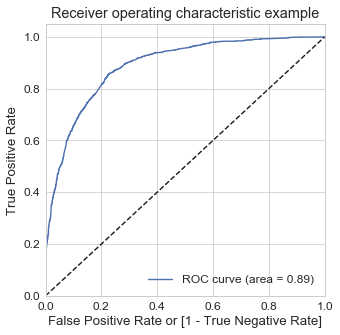

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Prob)

### Finding Optimal Cutoff Point

In [129]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.078195,6227,0,7.819526,1,0,0,0,0,0,0,0,0,0
1,0,0.116674,6322,0,11.667415,1,1,0,0,0,0,0,0,0,0
2,0,0.045781,3644,0,4.578062,1,0,0,0,0,0,0,0,0,0
3,0,0.129082,3011,0,12.908164,1,1,0,0,0,0,0,0,0,0
4,1,0.869345,8267,1,86.934503,1,1,1,1,1,1,1,1,1,0


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.375629,1.000000,0.000000
0.1,0.1,0.634273,0.972744,0.430645
0.2,0.2,0.758308,0.920465,0.660753
0.3,0.3,0.801443,0.860143,0.766129
0.4,0.4,0.810675,0.757819,0.842473
0.5,0.5,0.810675,0.683199,0.887366
0.6,0.6,0.802618,0.608579,0.919355
0.7,0.7,0.779288,0.499553,0.947581
0.8,0.8,0.756462,0.403932,0.968548
0.9,0.9,0.716348,0.263628,0.988710


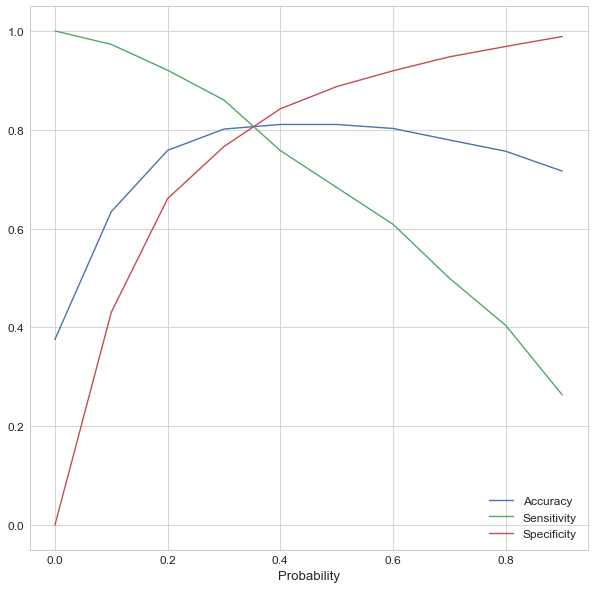

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'],figsize =(10,10))
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Lead_Prob,CustID,predicted,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.078195,6227,0,7.819526,1,0,0,0,0,0,0,0,0,0,0
1,0,0.116674,6322,0,11.667415,1,1,0,0,0,0,0,0,0,0,0
2,0,0.045781,3644,0,4.578062,1,0,0,0,0,0,0,0,0,0,0
3,0,0.129082,3011,0,12.908164,1,1,0,0,0,0,0,0,0,0,0
4,1,0.869345,8267,1,86.934503,1,1,1,1,1,1,1,1,1,0,1


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8039610607586438

### Precision and Recall

In [134]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3301,  419],
       [ 709, 1529]], dtype=int64)

In [135]:
#Precision
#TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7849075975359343

In [136]:
#Recall
#TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6831992850759607

### Precision and recall tradeoff

In [137]:
from sklearn.metrics import precision_recall_curve

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Lead_Prob)

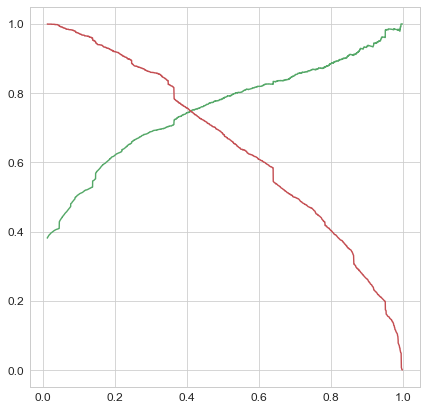

In [139]:
plt.figure(figsize=(7,7))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [140]:
X_test[colsumnsToScale] = scaler.transform(X_test[colsumnsToScale])
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
9058,0,-0.849009,0,0,0,1,0,0,0,0,0,0,0
5002,0,-0.180361,0,0,0,0,0,1,0,0,0,0,0
3472,0,-0.579718,0,0,0,1,0,0,1,0,0,0,0
6698,0,3.056630,0,0,0,0,0,1,0,0,0,0,0
6387,0,-0.233487,0,0,0,1,0,0,0,0,0,0,0


#### Making predictions on the test set

In [141]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [142]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [143]:
y_pred_1.head()

,0
9058,0.144259
5002,0.515538
3472,0.063282
6698,0.970787
6387,0.244904


In [144]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [145]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [146]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [147]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [148]:
y_pred_final.head()

,Converted,CustID,0
0,0,9058,0.144259
1,0,5002,0.515538
2,0,3472,0.063282
3,1,6698,0.970787
4,0,6387,0.244904


In [149]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})

In [150]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Lead_Prob'], axis=1)

In [151]:
y_pred_final.head()

,CustID,Converted,Lead_Prob
0,9058,0,0.144259
1,5002,0,0.515538
2,3472,0,0.063282
3,6698,1,0.970787
4,6387,0,0.244904


In [152]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [153]:
y_pred_final['lead_score']= y_pred_final.Lead_Prob.map(lambda x: x*100)

In [154]:
y_pred_final.head()

,CustID,Converted,Lead_Prob,final_predicted,lead_score
0,9058,0,0.144259,0,14.425945
1,5002,0,0.515538,1,51.553777
2,3472,0,0.063282,0,6.328199
3,6698,1,0.970787,1,97.078673
4,6387,0,0.244904,0,24.490400


In [155]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8104933437744715

In [156]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1261,  325],
       [ 159,  809]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8357438016528925

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.7950819672131147

### Precision and Recall

In [160]:
#Precision
#TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7134038800705468

In [161]:
#Recall
#TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8357438016528925

#### Business Requirement has given a ballpark of the target lead conversion rate to be around 80%. 
<p>Therefore we increase our cutoff for lead probability to 0.5 inorder to achieve a precision above 80%

In [162]:
# Appending y_test_df and y_pred_1
y_pred_final2 = pd.concat([y_test_df, y_pred_1],axis=1)

In [163]:
y_pred_final2.head()

,Converted,CustID,0
0,0,9058,0.144259
1,0,5002,0.515538
2,0,3472,0.063282
3,1,6698,0.970787
4,0,6387,0.244904


In [164]:
# Renaming the column 
y_pred_final2= y_pred_final2.rename(columns={ 0 : 'Lead_Prob'})

In [165]:
# Rearranging the columns
y_pred_final2 = y_pred_final2.reindex_axis(['CustID','Converted','Lead_Prob'], axis=1)

In [166]:
y_pred_final2.head()

,CustID,Converted,Lead_Prob
0,9058,0,0.144259
1,5002,0,0.515538
2,3472,0,0.063282
3,6698,1,0.970787
4,6387,0,0.244904


In [167]:
y_pred_final2['final_predicted'] = y_pred_final2.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [168]:
y_pred_final2['lead_score']= y_pred_final2.Lead_Prob.map(lambda x: x*100)

In [169]:
y_pred_final2.head()

,CustID,Converted,Lead_Prob,final_predicted,lead_score
0,9058,0,0.144259,0,14.425945
1,5002,0,0.515538,1,51.553777
2,3472,0,0.063282,0,6.328199
3,6698,1,0.970787,1,97.078673
4,6387,0,0.244904,0,24.490400


In [170]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final2.Converted, y_pred_final2.final_predicted)

0.8300704776820673

In [171]:
confusion3 = metrics.confusion_matrix(y_pred_final2.Converted, y_pred_final2.final_predicted )
confusion3

array([[1430,  156],
       [ 278,  690]], dtype=int64)

In [172]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [173]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7128099173553719

In [174]:
# Let us calculate specificity
TN / float(TN+FP)

0.9016393442622951

#### Precision

In [175]:
#TP / TP + FP

confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])


0.8156028368794326